<center>
    <h1>K Vizinhos mais próximos (KNN)</h1>
</center>

<h2> Introdução </h2> 

O algoritmo dos **K Vizinhos mais próximos (K Nearest Neighbors - KNN)** é baseado na ideia de que amostras com características (variáveis explicativas) semelhantes tendem a apresentar a mesma variável alvo ou variável alvo semelhante.

O passo a passo do algoritmo é bem simples:

1. Encontrar os K **pontos do conjunto de treino mais próximos** (vizinhos) da amostra de entrada;
2. **Sumarizar** as variáveis repostas (já conhecidas) desses pontos para obter a predição para a amostra de entrada.

Apesar de ser simples, analisando o algoritmo, encontramos alguns pontos que não são claros:

- O algoritmo não estima nenhum parâmetro?
- O que significa "sumarizar" as variáveis reposta dos vizinhos?
- Qual o melhor valor de *K*? O que muda quando temos um *K* muito pequeno ou muito grande?
- Como medimos a similaridade entre dois pontos?

Vamos abordar mais detalhadamente cada um desses pontos nas próximas sessões.

## Parâmetros

A primeira questão levantada é se o algoritmo não estima nenhum parâmetro, mas o que significa o algoritmo estimar um parâmetro? Vamos analisar a formulação da regressão linear para entender melhor.

Na regressão linear, o modelo assume a seguinte forma:

$$\large f(\mathbf{X}) = b_0\ +\ b_1x_1\ +\ b_2x_2\ +\ ...\ +\ b_nx_n$$

A princípio, nenhum $b_i$ é conhecido e o modelo deve estimá-los a partir dos dados de entrada. Todo componente desconhecido que é estimado pelo algoritmo é chamado de **parâmetro**.

Mas ainda no caso da regressão linear, quando usamos uma regularização Lasso ou Ridge, nós fornecemos ao algoritmo um valor $\alpha$ como fator de regularização. Esse valor também não é denominado parâmetro? Na realidade não. Como esse componente foi previamente estabelecido e não determinado pelo algoritmo, não o denominamos de parâmetro mas sim de **hiperparâmetro**. Eles recebem esse nome pois em geral os algoritmos utilizam essas informações para estimar os parâmetros e/ou fazer previsões.

Pela descrição do algoritmo, vemos que o KNN não realiza nenhuma estimativa em seu processo. Devido a esse comportamento, dizemos que o KNN é um algoritmo **não paramétrico**. Uma característica desse tipo de algoritmo é que eles não fazem suposições sobre as distribuições dos dados.

Além disso, o algoritmo faz uso diretamente de cada amostra da base de treino para dar a previsão sendo chamado também de algoritmo **baseado em instância (instance based learning)**. 

## Predição

Dissemos também que para obter a variável resposta de uma amostra deveríamos sumarizar a variável resposta já conhecida dos vizinhos. Mas o que isso significa na prática? Vamos analisar sobre dois pontos de vista: classificação e regressão.

### Classificação 

Quando estamos falando de classificação, a variável resposta é discreta. O modo mais intuitivo de determinar a classe de uma exemplo nesse cenário é simplesmente contando quantas amostras de cada classe são vizinhas desse exemplo. A classe predita será a classe com maior ocorrência.

Vamos tomar como exemplo um problema de classificação no qual queremos identificar se o e-mail A é *Spam* (classe 1) ou não (classe 0) baseado nos seus e-mails mais similares.

<div>
    <center> 
        <img src="images/knn_01.png" width="1500px" height="400px"/> 
    </center>
</div>

Também podemos utilizar o KNN para estimar a probabilidade de uma classe de acordo com a seguinte equação:

$$\large P(Y=j|X=x_0) = \frac{1}{K} \sum_{i \in N_0} I(y_i = j),$$
na qual $K$ é o número de vizinhos e $N_0$ é o conjunto de vizinhos de $x_0$. 

Essa equação quer dizer que a probabilidade de $x_0$ pertencer à classe $j$ é dada pela razão entre o número de vizinhos de $x_0$ que pertencem à classe $j$ e $K$.

<div>
    <center> 
        <img src="images/knn_02.png" width="1500px" height="400px"/> 
    </center>
</div>

A abordagem de escolher pela maioria é uma boa estratégia, mas vamos analisar mais de perto nosso exemplo. Podemos ver que os dois vizinhos mais próximos do nosso exemplo são da classe 0, mas mesmo assim, quando escolhemos K=5, a previsão que temos é que o nosso exemplo é da classe 1. Dessa forma, descartamos totalmente a informação das diferentes distâncias e tratamos todos os vizinhos como iguais.

Uma forma de considerarmos essa relação entre os vizinhos é atribuindo um peso ao voto de cada vizinho. 

$$\large P(Y=j|X=x_0) = \frac{\sum_{i \in N_0} w_i I(y_i = j)}{\sum_{i \in N_0} w_i}$$

Uma maneira simples de fazer isso é considerando o inverso da distância entre os pontos:

$$\large w_i = \frac{1}{d(x_0,x_i)}$$

na qual $d$ é uma medida de distância entre as amostras.

Os dados do nosso exemplo são os seguintes, já com distâncias e pesos calculados para o nosso exemplo alvo $x_0 = (0;0)$

In [63]:
import pandas as pd

df = pd.DataFrame({"X1": [-0.5, 1, -1.5, 2, -2.5],
                   "X2": [-0.5, 1, 1.5, -2, -2.5],
                   "y": [0, 0, 1, 1, 1],
                   "d": [np.round(x*np.sqrt(2), 2) for x in [0.5, 1, 1.5, 2, 2.5]],})
df["w"] = df["d"].apply(lambda x: np.round(1/x, 2))
df

,X1,X2,y,d,w
0,-0.5,-0.5,0,0.71,1.41
1,1.0,1.0,0,1.41,0.71
2,-1.5,1.5,1,2.12,0.47
3,2.0,-2.0,1,2.83,0.35
4,-2.5,-2.5,1,3.54,0.28


Com isso, podemos estimar as novas probabilidades:

<div>
    <center> 
        <img src="images/knn_03.png" width="1500px" height="400px"/> 
    </center>
</div>

### Regressão 

No problema de regressão, nossa variável alvo agora é contínua. Por esse motivo, fazer uma contagem das variáveis alvo dos vizinhos já não adequado. 

Nesse caso, uma solução bem simples que podemos adotar é supor que a variável alvo da minha amostra é igual à média das variáveis alvo dos vizinhos.

Vamos supor aqui que temos um conjunto de cidades e queremos prever a temperatura na cidade A baseado nas temperaturas de seus vizinhos.

<div>
    <center> 
        <img src="images/knn_04.png" width="1500px" height="400px"/> 
    </center>
</div>

Mas por que usar a média? Porque não o valor máximo? Ou o mínimo?

Essa escolha se deve ao fato de que de que a média é o valor que minimiza o **erro quadrático médio** (MSE) entre um conjunto de pontos.

Para entender melhor o que isso significa, vamos analisar o MSE para vários valores de predição no caso de K=5:

<div>
    <center> 
        <img src="images/knn_05.png" width="1500px" height="400px"/> 
    </center>
</div>

Observamos que independente do valor que escolhessemos, em nenhum caso conseguiríamos um MSE menor do que no valor da média. 

Um outro caso importante de se conhecer é quando escolhemos a **mediana**.

<div>
    <center> 
        <img src="images/knn_06.png" width="1500px" height="400px"/> 
    </center>
</div>

Neste caso, temos o valor que minimiza o **erro absoluto médio** (MAE).

<div>
    <center> 
        <img src="images/knn_07.png" width="1500px" height="400px"/> 
    </center>
</div>

Da mesma forma que na classificação ponderamos os votos pela distância, no caso contínuo podemos utilizar uma média ponderada nos valores das variáveis alvo dos vizinhos para incluirmos a noção de distância entre as amostras.

Nossos pontos continuam os mesmos e também a forma como calculamos os pesos é a mesma (o inverso da distância entre os pontos). O que mudar agora é a a variável resposta contínua:

In [148]:
df = pd.DataFrame({"X1": [-0.5, 1, -1.5, 2, -2.5],
                   "X2": [-0.5, 1, 1.5, -2, -2.5],
                   "y": [36, 40, 42, 37, 38],
                   "d": [np.round(x*np.sqrt(2), 2) for x in [0.5, 1, 1.5, 2, 2.5]],})
df["w"] = df["d"].apply(lambda x: np.round(1/x, 2))
df

,X1,X2,y,d,w
0,-0.5,-0.5,36,0.71,1.41
1,1.0,1.0,40,1.41,0.71
2,-1.5,1.5,42,2.12,0.47
3,2.0,-2.0,37,2.83,0.35
4,-2.5,-2.5,38,3.54,0.28


As novas previsões considerando as distâncias agora são:

<div>
    <center> 
        <img src="images/knn_08.png" width="1500px" height="400px"/> 
    </center>
</div>

## Número de Vizinhos

Nos exemplos anteriores, variamos o valor K para verificar a diferença entre as previsões. Na prática, só podemos escolher um valor para K. Então como escolhemos? É melhor um K alto ou um K baixo?

Vamos ver alguns exemplos de classificação. O caso da regressão é análogo e as mesmas conclusões se aplicam.

Primeiros, vamos olhar como são nossos dados:

<div>
    <center> 
        <img src="images/knn_09.png" width="1500px" height="400px"/> 
    </center>
</div>

Agora que já estamos vimos a distribuição dos dados, vamos treinar o KNN, alterando o valor de K para ver o que acontece. As imagens a seguir apresentam as fronteiras de decisão para cada valor de K analisado.

<div>
    <center> 
        <img src="images/knn_10.png" width="1500px" height="400px"/> 
    </center>
</div>

Analisando as imagens, percebemos que quando K=1, temos uma fronteira de bastante irregular. Conforme aumentamos o valor de K, a fronteira se torna mais comportada. No caso extremo, se considerassemos K como o número de amostras na base, teríamos uma única previsão (a da classe majoritária).

Podemos analisar esse comportamento a partir dos conceitos de **viés e variância**.

Recapitulando, o **viés** de um modelo é a medida do quanto o modelo consegue aprender com os dados de treino. Quanto mais irregular a fronteira de decisão, menor é o viés, pois o modelo consegue entender melhor as nuances dos dados. Por um lado isso é bom, mas sabemos que nossos dados contêm **ruídos**. Um modelo com viés muito baixo pode aprender conceitos que não são intrínsecos dos dados e sim frutos dos ruídos.

Por outro lado, a **variância** indica o poder de generalização do modelo, ou seja, o quanto do que meu modelo aprendeu no treino é relevante quando aplicamos o conjunto de teste ou em produção. De modo geral, modelos com alta variância apresentam baixo viés e vice-versa.

<div>
    <center> 
        <img src="images/knn_11.png" width="1500px" height="400px"/> 
    </center>
</div>

Pensando no KNN, temos as seguintes características:

1. Um valor de **K alto** significa um modelo com **alto viés e baixa variância**;
2. Um valor de **K baixo** implica um modelo com **baixo viés e alta variância**;

Portanto, quando escolhemos K, temos que escolher um valor intermediário que mantenha o equilíbrio.

## Distâncias 

Durante, toda a discussão até agora nos utilizamos os termos *vizinhos*, *mais próximos*, *mais parecidos*, etc. Entretanto, em momento algum nós paramos para entender o que exatamente significa dizer que um ponto é próximo de outro ou que um ponto se encontra na vizinhança de outro.

Matematicamente, o conceito de **distância**, também chamada **métrica**, é o seguinte:

> Uma distância **d** sobre um conjunto $\mathbb{X}$ é uma função $d:\mathbb{X}\ \times\ \mathbb{X} \to [0, \infty)$ 

E, para todo $x,y,z \in \ \mathbb{X}$, satisfaz:
> 1. $d(x,y) = 0 \iff x = y$
> 2. $d(x,y) = d(y,x)$
> 3. $d(x,y) \leq d(x,z) + d(z,y)$

Em termos mais simples, uma distância é um função que leva de um conjunto de variáveis à um número real positivo, satisfazendo as condições anteriores. Vamos dar uma olhada em algumas métricas de distância importantes.

### Euclidiana

A distância mais comumente utilizada é chamada **distância euclidiana**, também conhecida como **L2**. Ela é definida, para o caso de $n$ dimensões, pela equação abaixo:

$$Euclidiana(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

Vamos analisar um caso em duas dimensões. Suponha que tenhamos dois pontos $x=(0;0)$ e $y=(2;2)$. A distância euclidiana entre x e y é dada por:

$$Euclidiana(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2} =$$

$$\sqrt{(0-2)^2 + (0-2)^2} = \sqrt{4+4} = \sqrt{8} = 2,83$$

Podemos observar na imagem abaixo que essa equação é equivalente ao Teorema de Pitágoras em duas dimensões.

<div>
    <center> 
        <img src="images/knn_12.png" width="1500px" height="400px"/> 
    </center>
</div>

### Manhattan

A distância de **Manhattan** ou **L1** é muito similar à distância euclidiana. A diferença entre as duas é que, em vez de elevarmos ao quadrado o valor das diferenças, agora pegamos apenas os valores absolutos e não temos que tirar a raiz quadrada. Para $n$ dimensões, essa métrica é definida por:

$$Manhattan(x,y) = \sum_{i=1}^n |x_i - y_i|$$

Utilizando o mesmo exemplo anterior, temos:

$$Manhattan(x,y) = $$

$$|x_1-y_1| + |x_2-y_2| = |0-2|+ |0-2| = 2 + 2 = 4$$

<div>
    <center> 
        <img src="images/knn_13.png" width="1500px" height="400px"/> 
    </center>
</div>

Mas por que razão essa métrica é conhecida como "Manhattan". O motivo é que essa distância nos dá a quantidade de passos unitários perpendiculares a um dos eixos que temos que dar para chegar de um ponto a outro, como se estivessemos andando pelos quarteirões de um cidade (Manhattan, no caso).

<div>
    <center> 
        <img src="images/knn_14.png" width="1500px" height="400px"/> 
    </center>
</div>

### Minkowski

Na realidade, tanto a distância euclidiana quanto a distância de Manhattan fazem parte de uma família mais genérica de distâncias chamada **Minkowski**. A formulação dessa métrica é a seguinte, para uma ordem $p$ qualquer:

$$Minkowski(x,y) = \sqrt[\leftroot{7}\uproot{5}p]{\sum_{i=1}^n |x_i - y_i|^p}$$

Podemos observar que para $p=2$ temos a distância euclidiana e para $p=1$ temos a distância de Manhattan.

Só por questão de curiosidade vamos observar como a métrica se comporta no exemplo anterior quando alteramos $p$.

<div>
    <center> 
        <img src="images/knn_15.png" width="1500px" height="400px"/> 
    </center>
</div>

Podemos ver que conforme aumentamos a ordem, a curva tende a convergir para 2. Na verdade, quando $p = \infty$, o valor da distância de Minkowski converge para a distância da dimensão com distância individual. Matematicamente:

$$\lim_{p\to\infty} Minkowski(x,y) = \max(|x_1-y_1|, |x_2-y_2|, ..., |x_n-y_n|)$$

### Cosseno 

Uma última métrica que vamos avaliar é a **distância do cosseno**. Matematicamente, ela é definida como:

$$DistCosseno(x,y) = 1  - SimCosseno(x,y)$$

$$SimCosseno(x,y) = \frac{x \bullet y}{\sqrt{x \bullet x}\sqrt{y \bullet y}}$$

A similaridade do cosseno indica qual o cosseno entre o ângulo formado pelo vetor $x$ e o vetor $y$. Quanto maior o ângulo entre eles, menos alinhados estão os dois vetores e menor a similaridade. Em contrapartida, quanto menor a similaridade maior é a distância entre os vetores.

Na verdade, a distância do cosseno não satisfaz a propriedade 1 da nossa definição caso os vetores não estejam normalizados. Mesmo assim, devido a sua grande aplicação vamos estudá-la aqui.

Mas quando vamos querer utilizar essa medida em vez de alguma outra já vista? 

A distância do cosseno é muito utilizada quando a magnitude dos vetores não importa. Um exemplo prático é em análise de textos. Suponha que tenhamos 3 textos (A, B e C). Vamos considerar como variáveis a quantidade de vezes que a palavra "Esporte" aparece e a quantidade de vezes que a palavra "Livros" aparece.

Os dados são os seguintes:

In [440]:
pd.DataFrame({"Esporte":[1, 3, 3],
              "Livros": [2, 1, 4]}, index="A B C".split())

,Esporte,Livros
A,1,2
B,3,1
C,3,4


Calculando a distância euclidiana entre A e B temos

$$Euclidiana(A,B) = 2,23$$

Já entre A e C temos

$$Euclidiana(A,C) = 2,83$$

Baseando-nos nessa análise, poderíamos concluir que o texto A é mais parecido com B do que com C.

Mas vamos analisar o gráfico antes de fazermos qualquer afirmação.

<div>
    <center> 
        <img src="images/knn_16.png" width="1500px" height="400px"/> 
    </center>
</div>

Podemos observar que a orientação do vetor C é muito mais próxima de A do que a orientação do vetor B, ou seja, a proporção entre o número de ocorrências de "Livro" e "Esporte" é mais parecida entre os textos A e C do que entre A e B. Se considerarmos que os textos podem ter tamanhos diferentes, a diferença entre A e C pode ser dada por C ser mais longo.

Vamos analisar agora a distância do cosseno entre os vetores:

$$DistCosseno(A,B) = 0,29$$

e 

$$DistCosseno(A,C) = 0,02$$

Por essa métrica, agora A e C são mais próximos que A e B. Com isso, concluímos então que, se estivermos mais interessados na diferença de orientação dos vetores, a utilização da distância do cosseno é mais adequada do que a distância euclidiana.

## Índices 

Na seção anterior concluímos as explicações de todas as dúvidas levantadas na introdução. Mas ainda resta um ponto de atenção que não comentamos: o custo computacional.

Para cada novo exemplo, precisamos encontrar os K pontos mais próximos dele. Para fazer isso, precisamos passar por todos os pontos de teste, calculando a distância entre eles. Quando o número de pontos de possíveis vizinhos começa a aumentar muito, o custo computacional da busca fica muito caro.


<div>
    <center> 
        <img src="images/knn_17.png" width="1500px" height="400px"/> 
    </center>
</div>

Um modo de reduzir esse problema é criando índices, em formato de árvores, que reduzem nosso espaço de busca.

### KD - Tree 

As **KD-Trees (K Dimensional Trees)** dividem o espaço original em cortes paralelos aos eixos originais. A estrutura final é uma árvore binária.

O algoritmo para sua criação é o seguinte:

1. Para o nó atual, encontre a dimensão com maior variância;
2. Faça um corte na mediana dessa dimensão;
3. O filho da direita conterá os pontos com valor maior do que a mediana naquela dimensão e o filho da esquerda os pontos com valor menor;
4. Para cada um dos filhos, repita o passo 1.

Dada essa árvore, nós a percorremos até encontrar a região que o ponto se encontra. A busca dos vizinhos só é feita nas amostras que estão naquela região ou em regiões vizinhas.

Vamos fazer um exemplo prático para fixar. Para isso vamos utilizar o seguinte conjunto de dados

<div>
    <center> 
        <img src="images/knn_18.png" width="1500px" height="400px"/> 
    </center>
</div>

Calculando a variância em cada dimensão, temos

$$ \sigma^2(X_1) = 7,93$$ 

e 

$$ \sigma^2(X_2) = 9,73$$

Logo, escolhemos a variável $X_2$ para fazermos o corte. 

A mediana da dimensão $X_2$ é -0,82. Logo, nossa divisão do espaço é feita da seguinte maneira:

<div>
    <center> 
        <img src="images/knn_19.png" width="1500px" height="400px"/> 
    </center>
</div>

Agora temos dois conjuntos de dados: um com os pontos nos quais $X_2$ é maior que -0,82 e outro com os pontos nos quais $X_2$ é menor. Vamos aplicar o mesmo procedimento para cada um desses conjuntos.

Começamos com $X_2 \geq -0,82$. 

$$ \sigma^2(X_1|X_2 \geq -0,82) = 7,08$$ 

e 

$$ \sigma^2(X_2|X_2 \geq -0,82) = 2,08$$

Com isso, a variável que escolhemos agora para fazer o corte é $X_1$. Calculando a mediana, chegamos à 0,58.

<div>
    <center> 
        <img src="images/knn_20.png" width="1500px" height="400px"/> 
    </center>
</div>

Analogamente para $X_2 \lt -0.82$:

$$ \sigma^2(X_1|X_2 \lt -0,82) = 8,75$$ 

e 

$$ \sigma^2(X_2|X_2 \lt -0,82) = 0,2$$

Novamente, a dimensão com maior variância é $X_1$ e o valor da mediana é 0,25.

<div>
    <center> 
        <img src="images/knn_21.png" width="1500px" height="400px"/> 
    </center>
</div>

Poderíamos continuar fazendo o mesmo procedimento até chegarmos a uma amostra por região, por exemplo, mas vamos para por aqui e ver como faríamos para procurar os vizinhos. 

Suponha que queremos prever o ponto Z = (-2,4). A primeira comparação que temos que fazer é se o ponto possui $X_2 \geq -0,82$. Vemos que sim então vamos fazer a busca agora só na parte superior do espaço.

<div>
    <center> 
        <img src="images/knn_22.png" width="1500px" height="400px"/> 
    </center>
</div>

A segunda pergunta que temos que fazer, dado que estamos na parte superior é: $X_1 \geq 0,58$? Podemos ver que não, então nossa região de interesse é região à esquerda. Agora que não temos mais perguntas, nós chegamos na nossa região de interesse e a nossa busca é feita somente entre esses pontos, reduzindo muito a quantidade de cálculos executados.

<div>
    <center> 
        <img src="images/knn_23.png" width="1500px" height="400px"/> 
    </center>
</div>

### Ball-Tree

Assim como as KD-trees, as **Ball-Trees** particionam o conjunto de dados em conjuntos menores, mas agora não fazemos mais cortes perpendiculares aos eixos e sim criamos bolas em K dimensões. A representação final continua sendo uma árvore binária, mas agora o critério de quebra é o pertencimento ou não à bola.

Um dos algoritmos para criação dessa estrutura é o seguinte:

1. Para o nó atual, encontre o centroide;
2. Determine o ponto $c_1$ como o ponto mais distante do centroide;
3. Determine o ponto $c_2$ como o ponto mais distante de $c_1$;
4. Para todos os outros pontos, determine a bola a que ele pertece calculando $min(d(x, c_1), d(x, c_2))$;
5. O filho da esquerda é a bola com centro $c_1$ e raio $max(d(c_1,x))$ para to $x$ pertencente a essa bola;
6. O filho da direita é a bola com centro $c_2$ e raio $max(d(c_2,y))$ para to $y$ pertencente a essa bola;
7. Para cada filho, refaça o passo 1.

Vamos continuar com o mesmo exemplo da seção anterior. A primeira coisa que temos que fazer é calcular o centroide desses pontos. Fazendo a média em cada dimensão chegamos à:

$$ centroide(X_1, X_2) = (0,15;0,04)$$

<div>
    <center> 
        <img src="images/knn_24.png" width="1500px" height="400px"/> 
    </center>
</div>

Vamos agora calcular qual o ponto mais distante do centroide.

<div>
    <center> 
        <img src="images/knn_25.png" width="1500px" height="400px"/> 
    </center>
</div>

E agora o ponto mais longe de $c_1$.

<div>
    <center> 
        <img src="images/knn_26.png" width="1500px" height="400px"/> 
    </center>
</div>

Vamos agora analisar quais pontos entraram em qual bola.

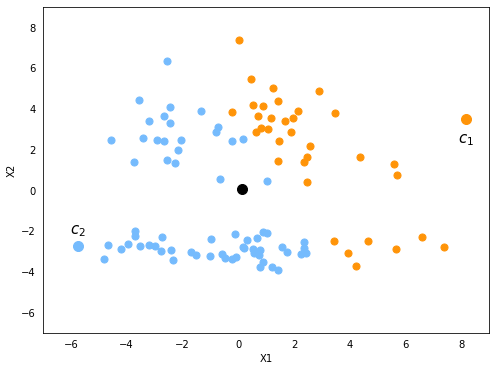

In [528]:
from matplotlib import patches
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(X[ball,0], X[ball,1], c="xkcd:tangerine", s=50, label="1")
axes.scatter(X[~ball,0], X[~ball,1], c="xkcd:sky blue", s=50, label="0")
axes.scatter([0.15], [0.04], s=100, c="black")
axes.scatter([8.16], [3.5], s=100, c="xkcd:tangerine")
axes.scatter([-5.76], [-2.76], s=100, c="xkcd:sky blue")
axes.text(8.16, 2.5, "$c_1$", size=15, va="center", ha="center")
axes.text(-5.76, -2, "$c_2$", size=15, va="center", ha="center")
axes.set_xlabel("X1")
axes.set_ylabel("X2")
axes.tick_params(bottom=False, left=False,)
axes.set_xlim((-7,9))
axes.set_ylim((-7,9));

<div>
    <center> 
        <img src="images/knn_27.png" width="1500px" height="400px"/> 
    </center>
</div>

E vamos traçar a bolas considerando o raio máximo de cada região.

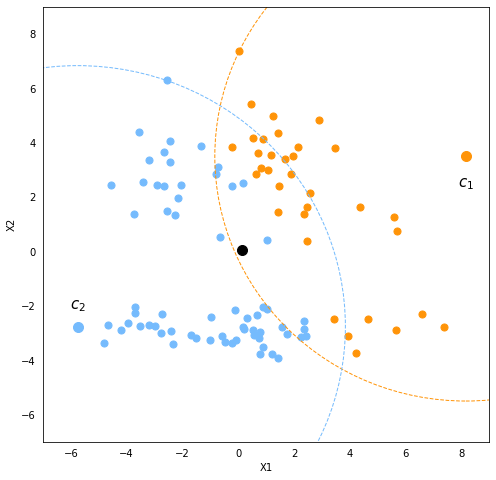

In [529]:
from matplotlib import patches
fig, axes = plt.subplots(figsize=(8,8))
axes.add_artist(plt.Circle((8.16, 3.5), 9, fill=False, edgecolor="xkcd:tangerine", ls="dashed"))
axes.add_artist(plt.Circle((-5.76, -2.76), 9.6, fill=False, edgecolor="xkcd:sky blue", ls="dashed"))
axes.scatter(X[ball,0], X[ball,1], c="xkcd:tangerine", s=50, label="1")
axes.scatter(X[~ball,0], X[~ball,1], c="xkcd:sky blue", s=50, label="0")
axes.scatter([8.16], [3.5], s=100, c="xkcd:tangerine")
axes.scatter([-5.76], [-2.76], s=100, c="xkcd:sky blue")
axes.text(8.16, 2.5, "$c_1$", size=15, va="center", ha="center")
axes.text(-5.76, -2, "$c_2$", size=15, va="center", ha="center")
axes.set_xlabel("X1")
axes.set_ylabel("X2")
axes.tick_params(bottom=False, left=False,)
axes.set_xlim((-7,9))
axes.set_ylim((-7,9));

<div>
    <center> 
        <img src="images/knn_28.png" width="1500px" height="400px"/> 
    </center>
</div>

Da mesma forma que fizemos com a KD-Tree, podemos fazer recursivamente o processo e ir criando bolas dentro das bolas.

Para buscar os vizinhos, vamos comparando em qual bola o ponto está e o espaço de busca se torna somente os pontos que se encontram lá dentro.

Um fato relevante é que, em problemas de alta dimensionalidade, a Ball-Tree se torna mais eficiente do que a KD-Tree.